In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

In [4]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [ ]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# define lenslet array
crl_list = []

spacing = 100e-6
x_pos = np.linspace(-1.5, 1.5, 4, dtype=float)*spacing
y_pos = np.linspace(-1.5, 1.5, 4, dtype=float)*spacing

for i in range(4):
    for j in range(4):
        crl_list.append(optics.CRL('crl%d' % (4*i+j), z=788.335, dx=x_pos[i], dy=y_pos[j], roc=5e-6, diameter=30e-6))

lens_image = optics.PPM('lens', FOV=1e-3, z=788.335)
        
IP = optics.PPM('IP', FOV=500e-6, z=789)

lens_image2 = optics.PPM('lens_image', FOV=2e-3, z=788.336)
lens_sum = optics.PPM('lens_sum', FOV=2e-3)
IP_sum = optics.PPM('IP_sum', FOV=500e-6)
IP_sum2 = optics.PPM('IP_sum2', FOV=500e-6)

devices = devices = [mr1l0,mr2l0,lens_image]

XPP_1 = beamline2d.Beamline(devices)

beam_lens = XPP_1.propagate_beamline(b1)

for i in range(len(crl_list)):
    devices = [crl_list[i], lens_image2, IP]

    XPP_2 = beamline2d.Beamline(devices)
    
    b2 = XPP_2.propagate_beamline(beam_lens)
    
    lens_sum.add_profile(XPP_2.lens_image.profile)
    
    IP_sum.add_profile(XPP_2.IP.profile)
    IP_sum2.add_complex_profile(b2)

FWHM in x: 359.90462293506476 microns
FWHM in y: 359.90462293506476 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 41049000.00 microns
goal for zx: 158335000.00 microns
current zx: 117286000.00 microns
goal for zy: 158335000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 2738314.74 microns
goal for zx: 158335000.00 microns
current zx: 155596685.26 microns
goal for zy: 158335000.00 microns
current zy: 155596685.26 microns
lens
crl0
focal length: 0.66
drift1
zRx: 2741.19 microns
zRy: 2741.19 microns
remaining distance

<IPython.core.display.Javascript object>


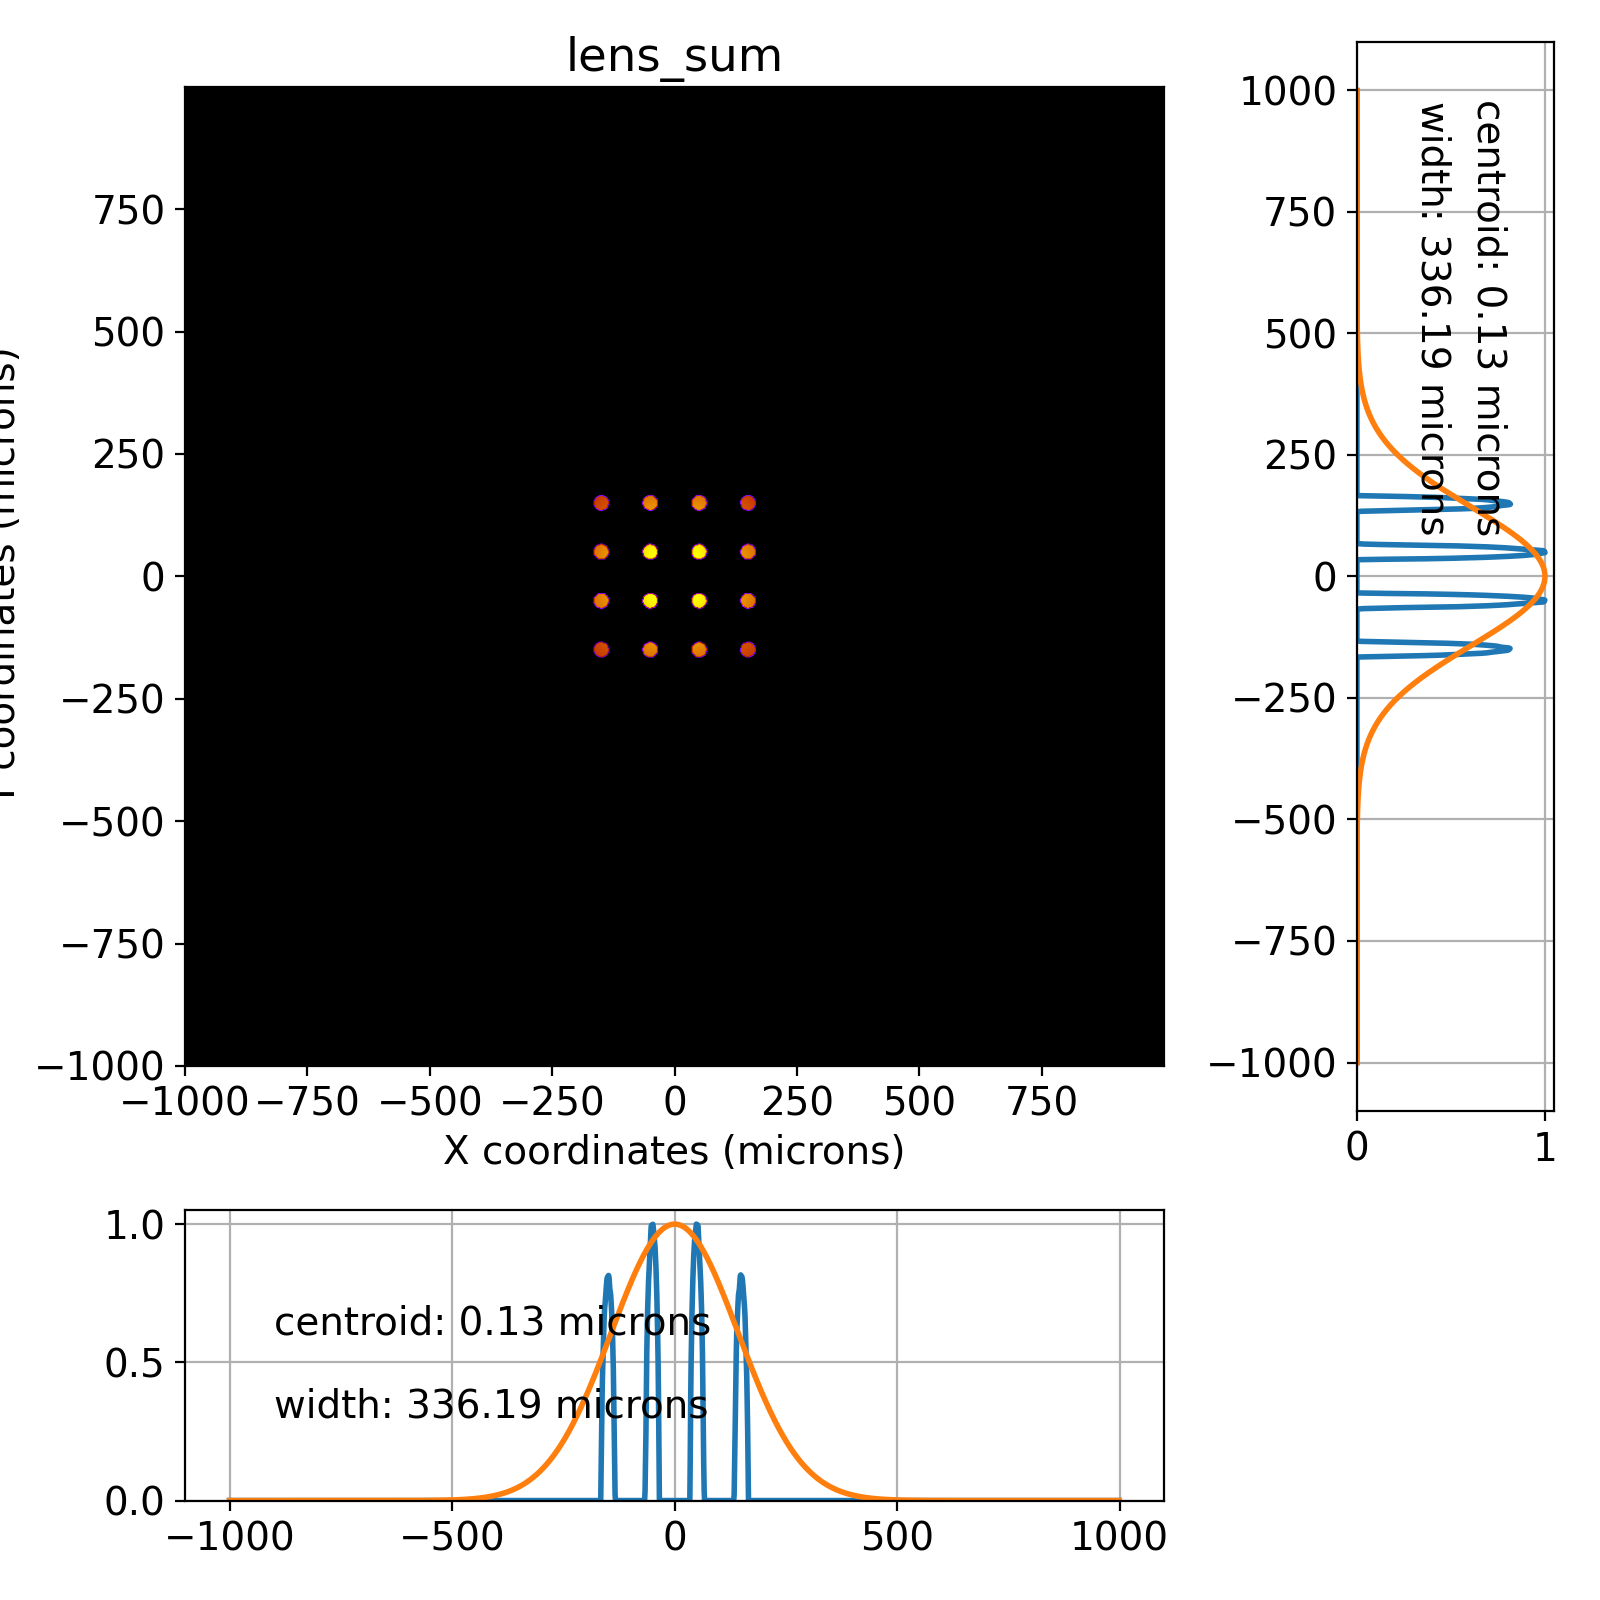

<IPython.core.display.Javascript object>


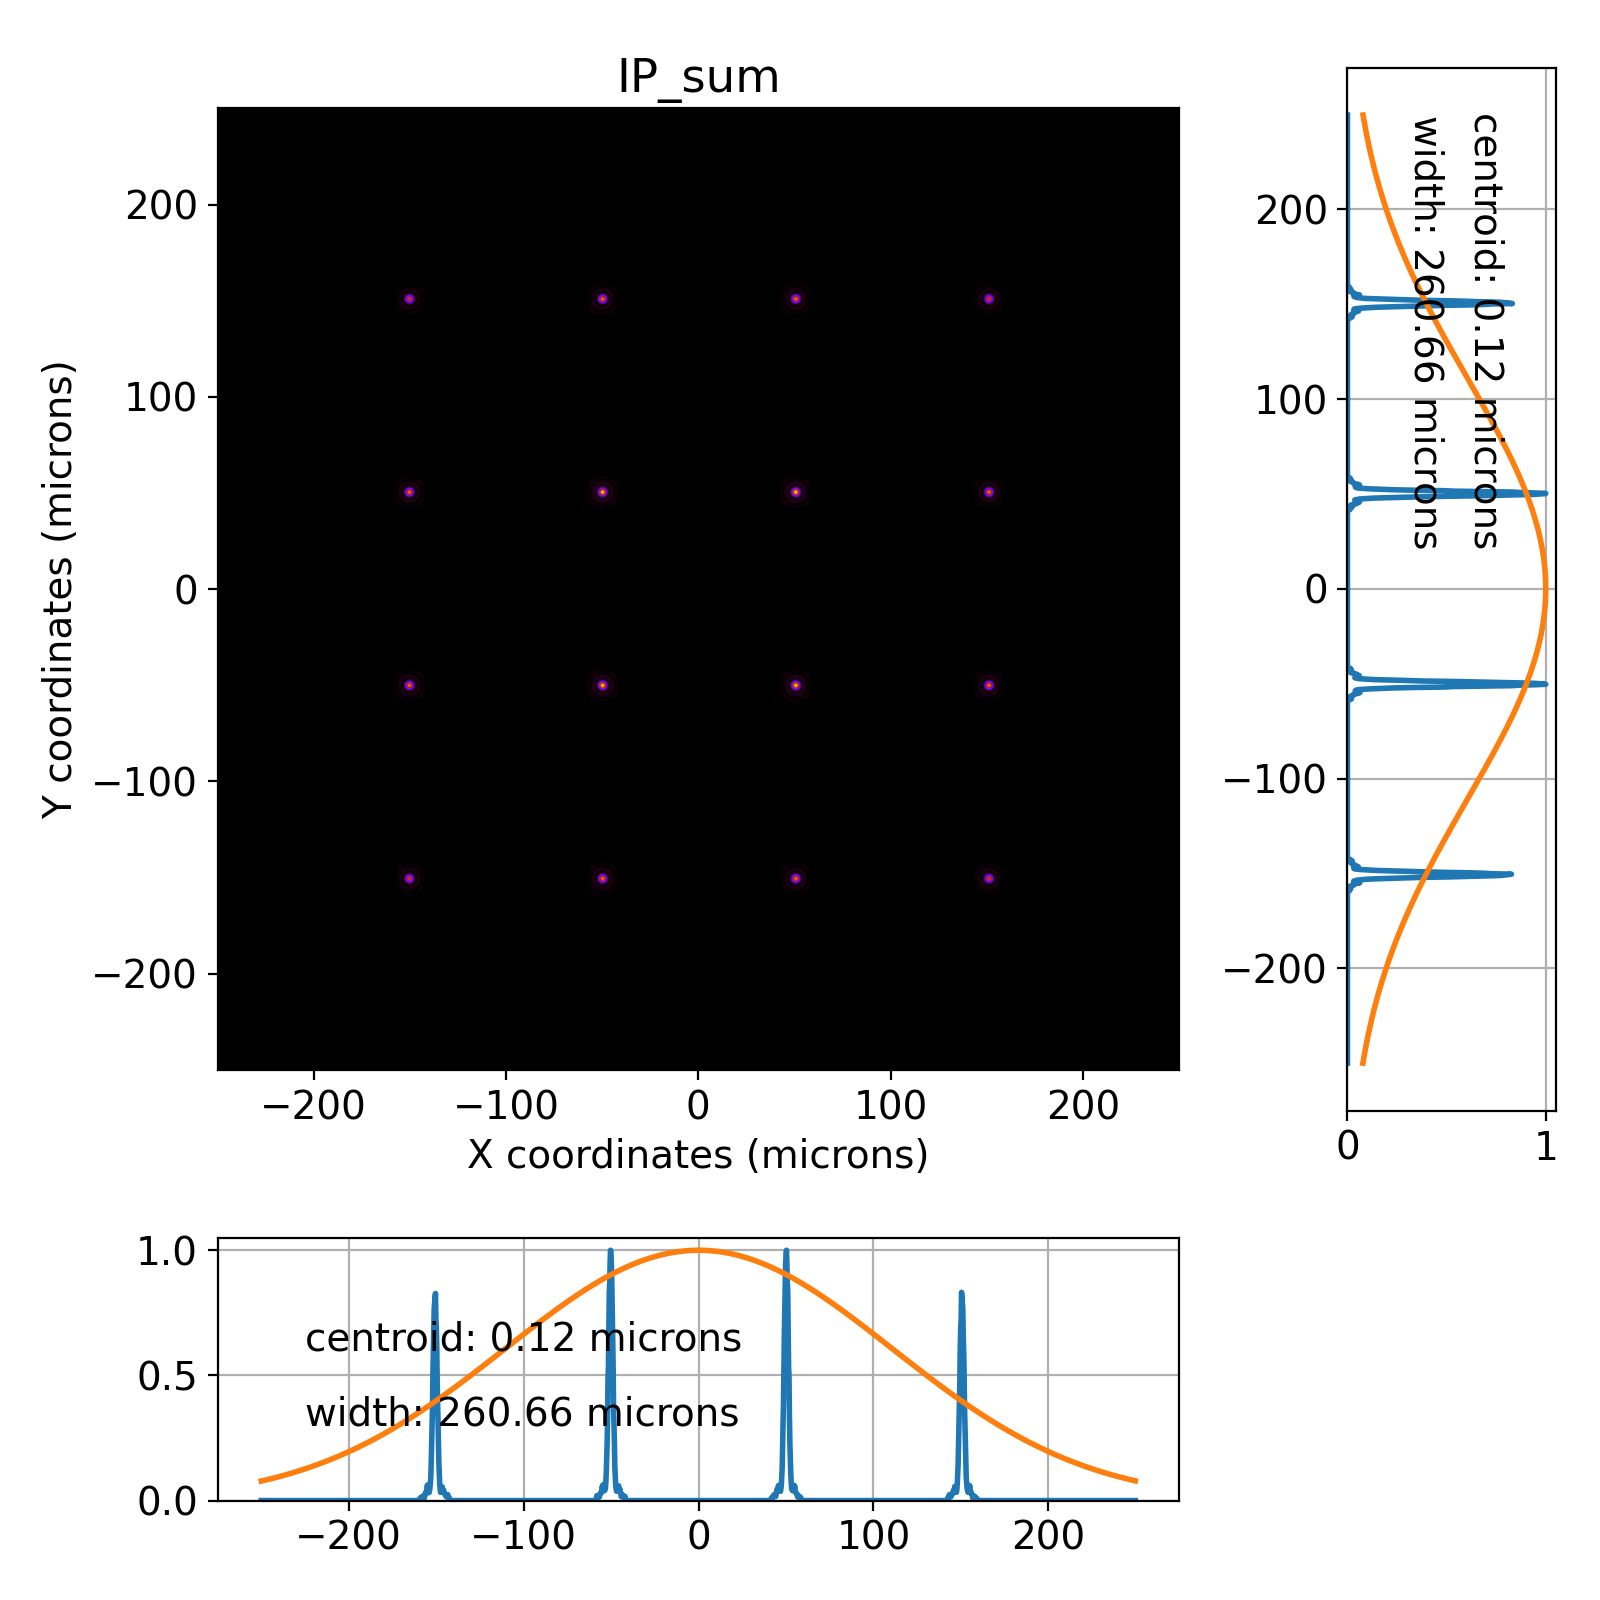

<IPython.core.display.Javascript object>


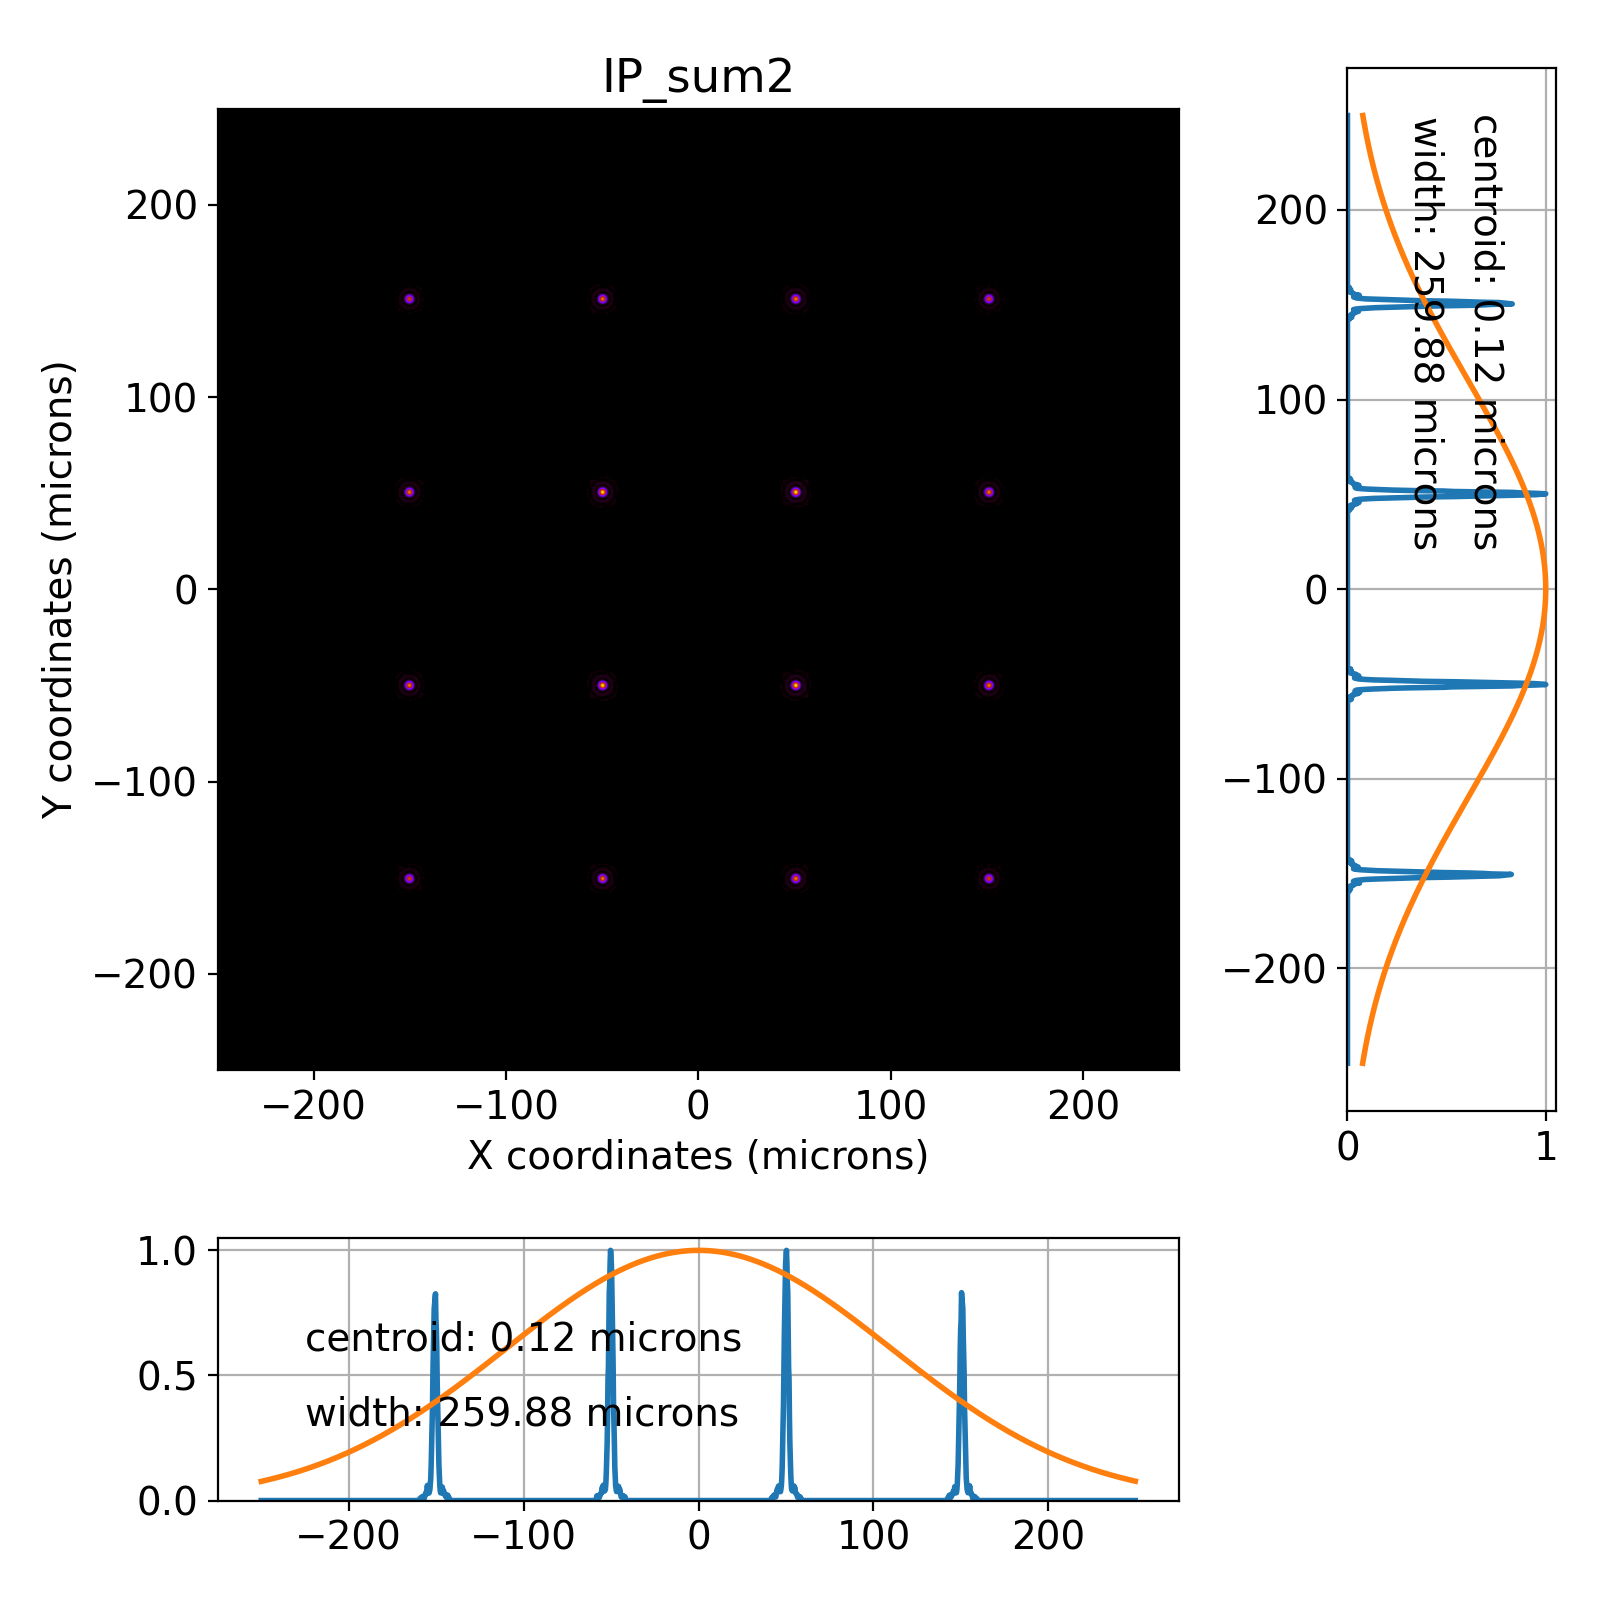

In [9]:
lens_sum.view_beam()
IP_sum.view_beam()
IP_sum2.view_beam()

<IPython.core.display.Javascript object>


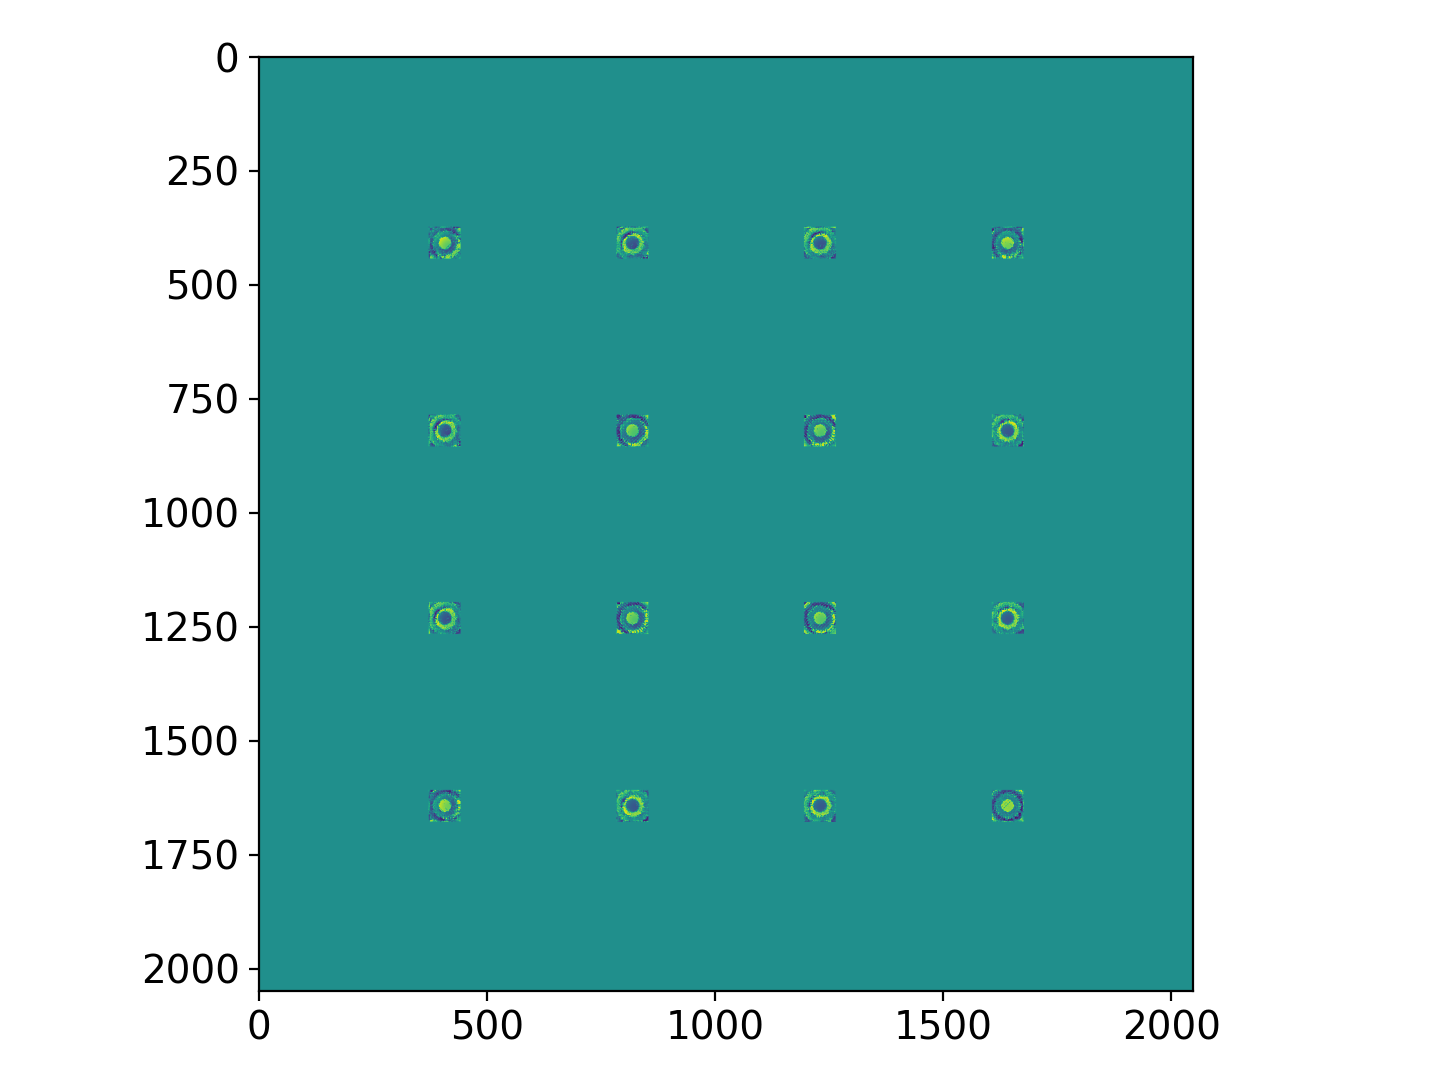

In [7]:
plt.figure()
plt.imshow(np.angle(IP_sum2.complex_profile))